In [1]:
    # Importing Libraries
    
    # Utility Libraries
    import numpy as np
    import pandas as pd
    
    # Visualisation Libraries
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # Data Processing Libraries
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import chi2
    from sklearn import model_selection
    from sklearn.metrics import mean_squared_error, r2_score
    
    # Algorithm Libraries
    from sklearn.ensemble import ExtraTreesClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor
    
    # Math Library
    import math
    
    # Importing Dataset
    df = pd.read_csv("D:\Jaidhev\Computer_Science\Sync Interns\Boston House Price Prediction\HousingData.csv")
    
    # Printing Dataset
    df.head()

    

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [3]:
df.shape

(506, 14)

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


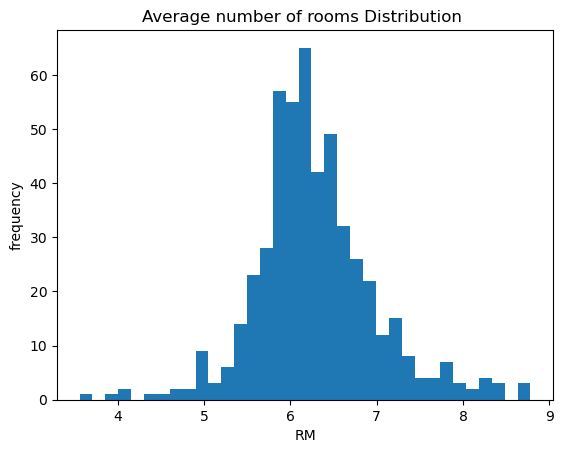

In [5]:
fig=plt.figure()
ax=fig.add_subplot(1, 1, 1)
ax.hist(df['RM'], bins = 35)
plt.title("Average number of rooms Distribution ")
plt.xlabel("RM")
plt.ylabel("frequency")
plt.show()


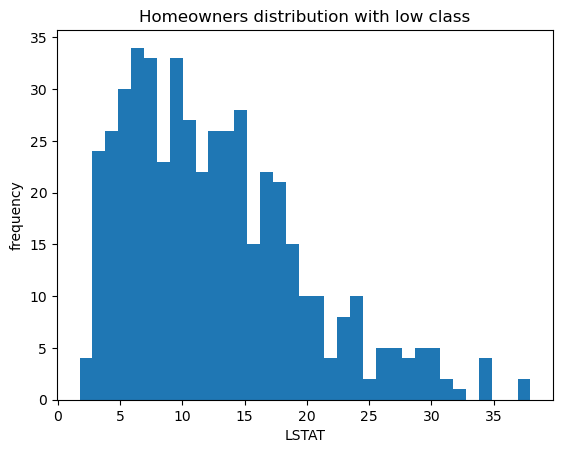

In [6]:
fig=plt.figure()
ax=fig.add_subplot(1, 1, 1)
ax.hist(df['LSTAT'], bins = 35)
plt.title("Homeowners distribution with low class")
plt.xlabel("LSTAT")
plt.ylabel("frequency")
plt.show()


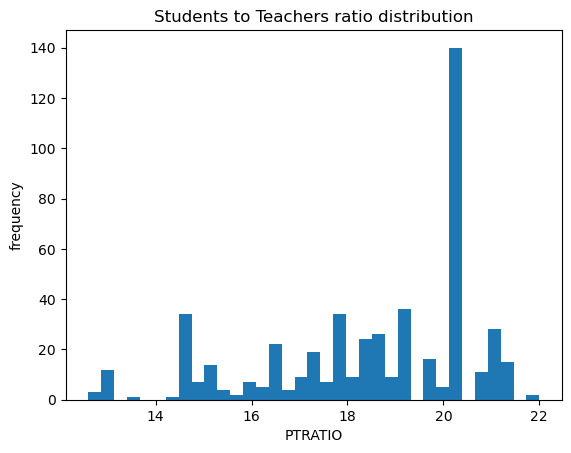

In [7]:
fig=plt.figure()
ax=fig.add_subplot(1, 1, 1)
ax.hist(df['PTRATIO'], bins = 35)
plt.title("Students to Teachers ratio distribution")
plt.xlabel("PTRATIO")
plt.ylabel("frequency")
plt.show()


In [8]:
df = df.fillna(df.mean())
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

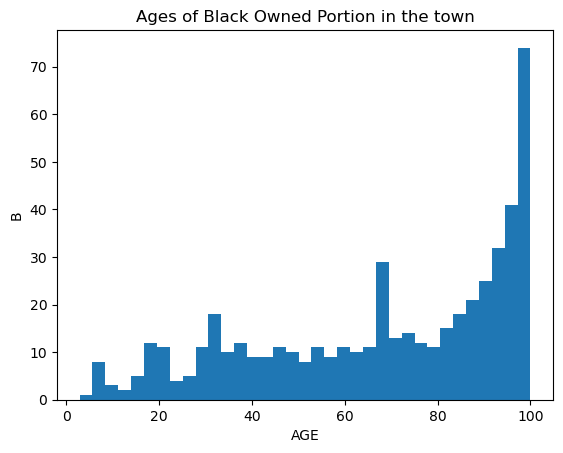

In [9]:
fig=plt.figure()
ax=fig.add_subplot(1, 1, 1)
ax.hist(df['AGE'], bins = 35)
plt.title("Ages of Black Owned Portion in the town")
plt.xlabel("AGE")
plt.ylabel("B")
plt.show()

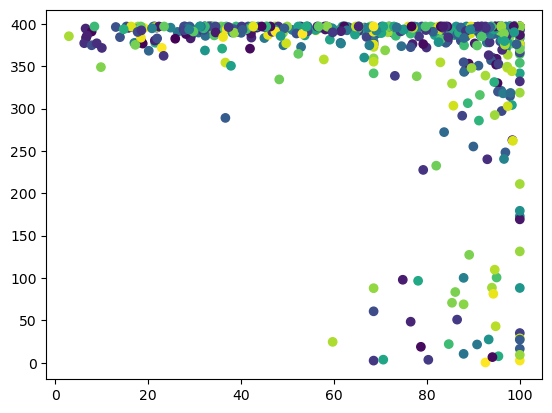

In [10]:
N = 506
x = df.AGE
y = df.B
colors = np.random.rand(N)

plt.scatter(x, y, c=colors)
plt.show()

In [14]:
df = df.fillna(df.mean())
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [15]:
df.rename(columns={'MEDV':'PRICE'}, inplace = True)

In [16]:
corr = df.corr()
corr.shape

(14, 14)

In [17]:
df.shape

(506, 14)

In [18]:
X = df.iloc[:,0:13] #independent columns
y = df.iloc[:,-1] #target column i.e price range

y = np.round(df['PRICE'])
#Apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['SPECS','SCORE'] #naming the dataframe columns
featureScores


,SPECS,SCORE
0,CRIM,5332.588364
1,ZN,5817.411645
2,INDUS,826.590604
3,CHAS,59.037323
4,NOX,5.073299
5,RM,21.981504
6,AGE,2201.715129
7,DIS,163.919426
8,RAD,1445.257647
9,TAX,14817.836927


In [19]:
print(featureScores.nlargest(8,'SCORE')) #print 5 best features

    SPECS         SCORE
9     TAX  14817.836927
1      ZN   5817.411645
0    CRIM   5332.588364
11      B   3340.486412
6     AGE   2201.715129
8     RAD   1445.257647
12  LSTAT   1329.940743
2   INDUS    826.590604


In [21]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

<Axes: >

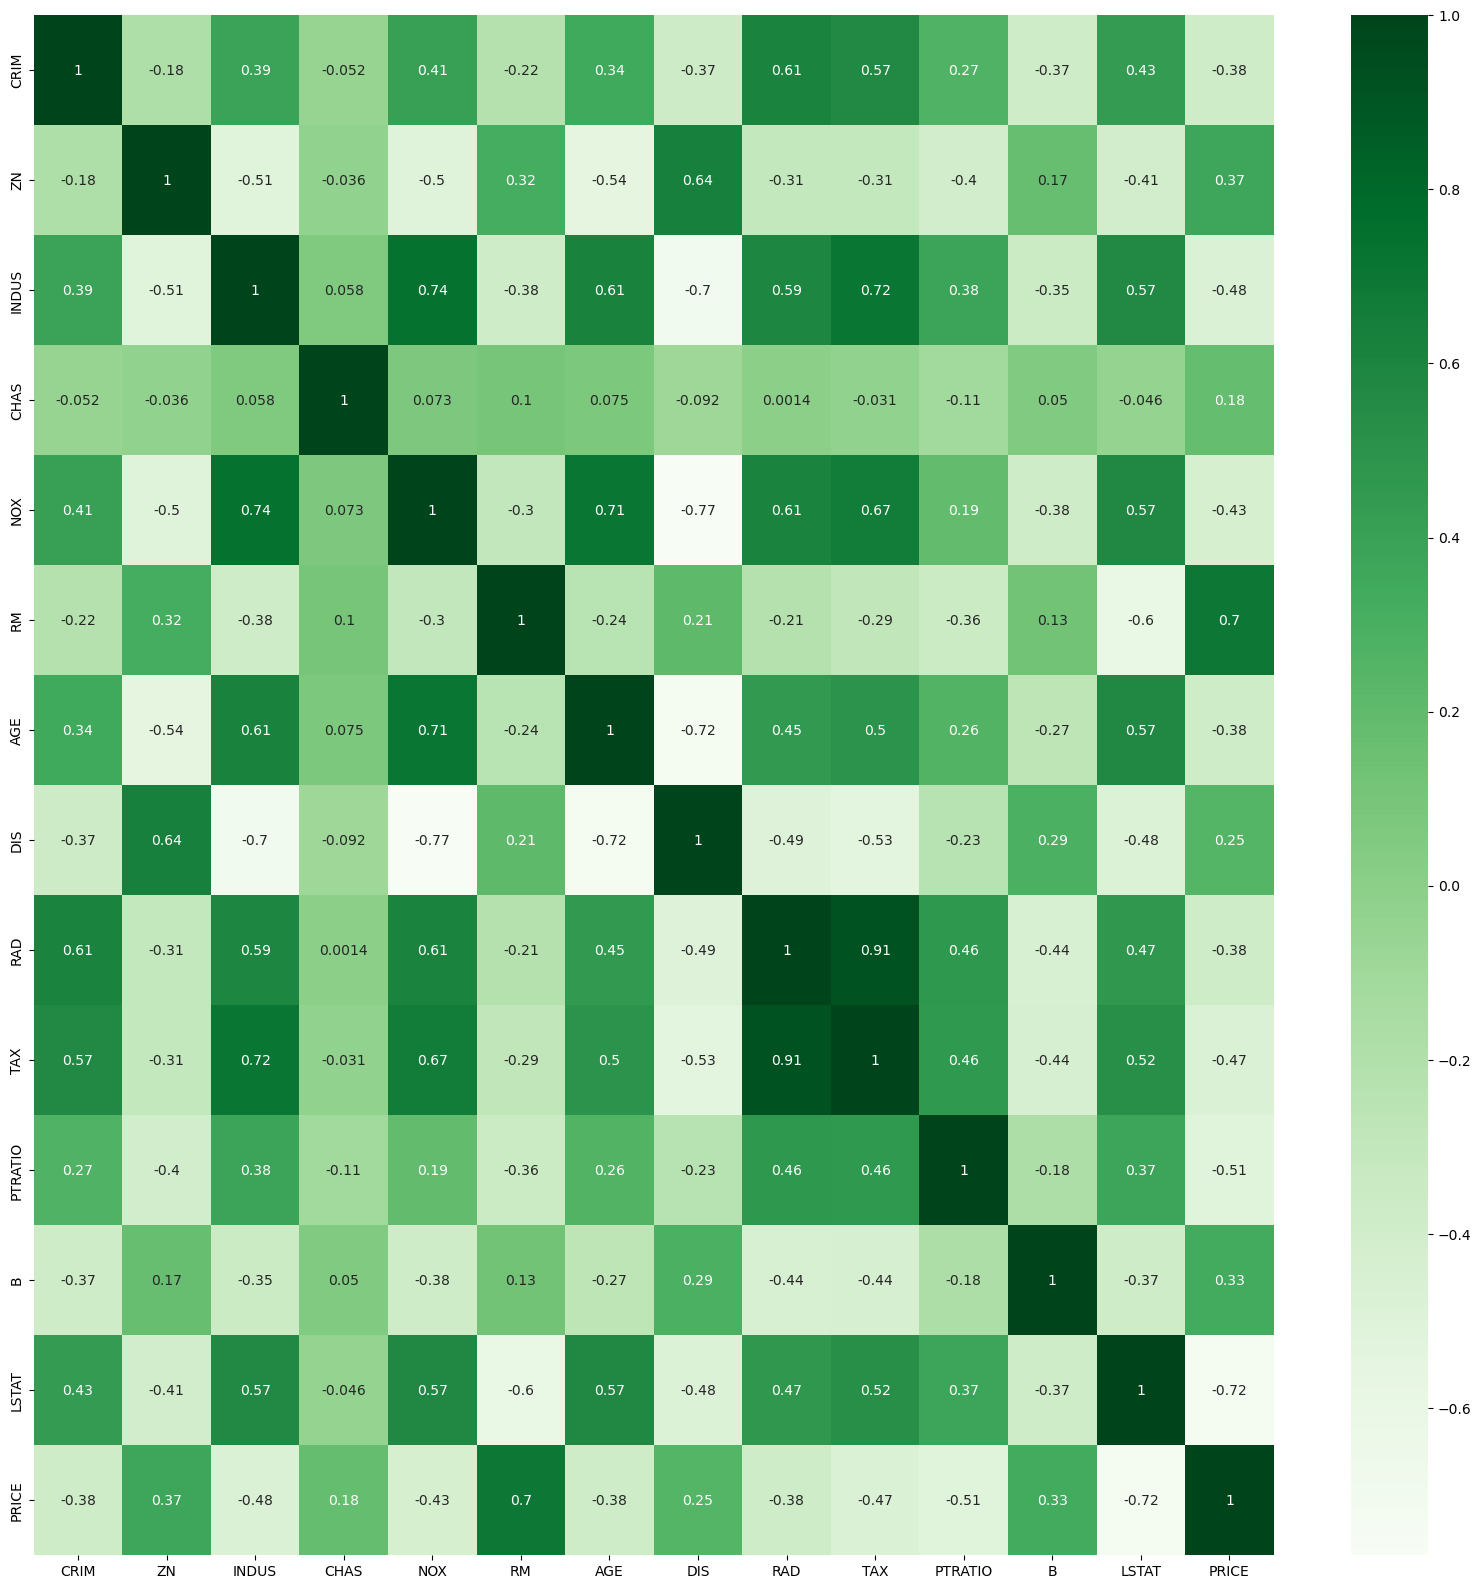

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap="Greens")

In [45]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [46]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [47]:
# Value of y intercept
lm.intercept_

34.32756517887741

In [48]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.121547
1,ZN,0.049349
2,INDUS,-0.083327
3,CHAS,5.21037
4,NOX,-13.742029
5,RM,3.420612
6,AGE,-0.003343
7,DIS,-1.49624
8,RAD,0.281914
9,TAX,-0.0118


In [49]:
# Model prediction on train data
y_pred = lm.predict(X_train)

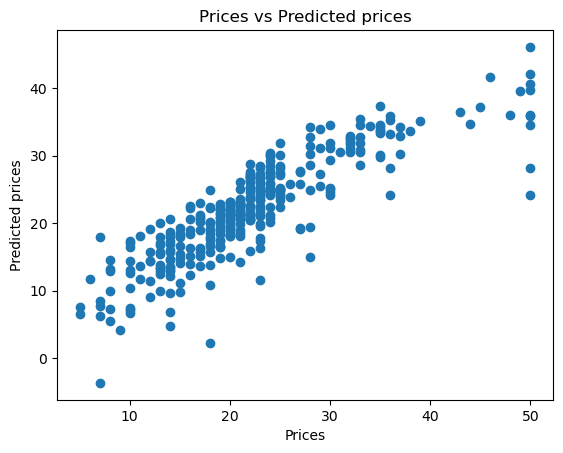

In [50]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

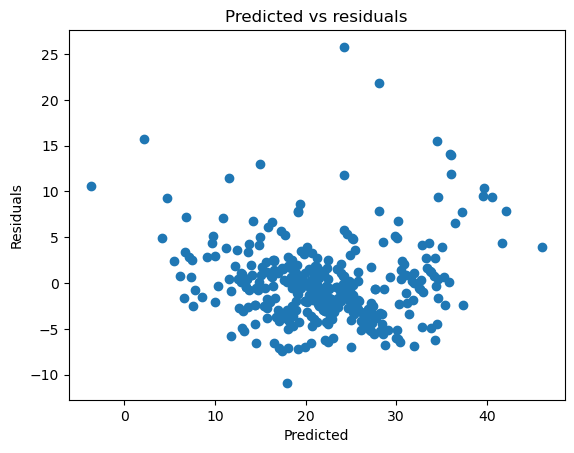

In [51]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

C:\Users\jayak\AppData\Local\Temp\ipykernel_17844\3326403628.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_pred)


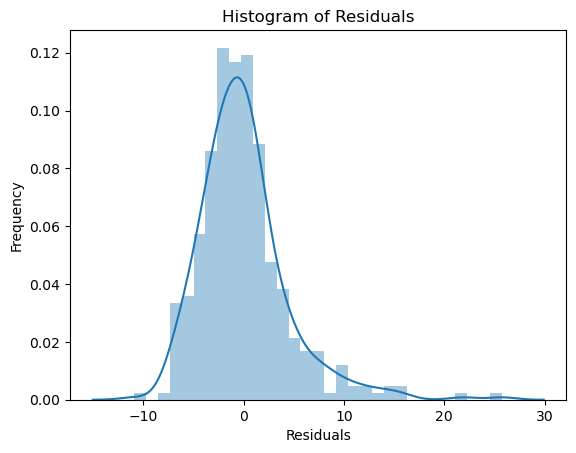

In [52]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [53]:
y_test_pred = lm.predict(X_test)

In [54]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.6974157067926002
Adjusted R^2: 0.6689113893165408
MAE: 3.9568494231332503
MSE: 31.6753263737837
RMSE: 5.628083721284155


In [55]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

In [56]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [57]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9781113656973772
Adjusted R^2: 0.9772744473269829
MAE: 0.8523446327683616
MSE: 1.6525929378531075
RMSE: 1.2855321613452957


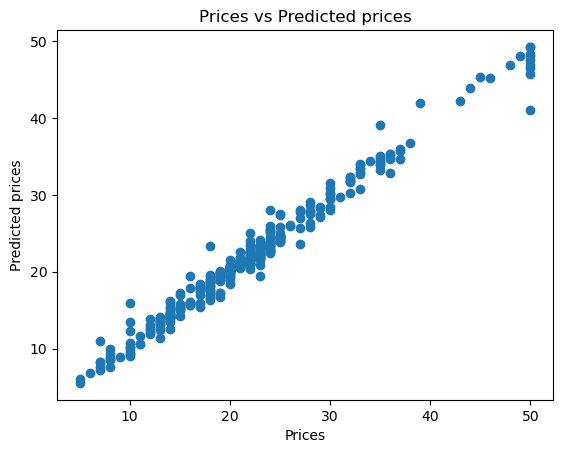

In [58]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

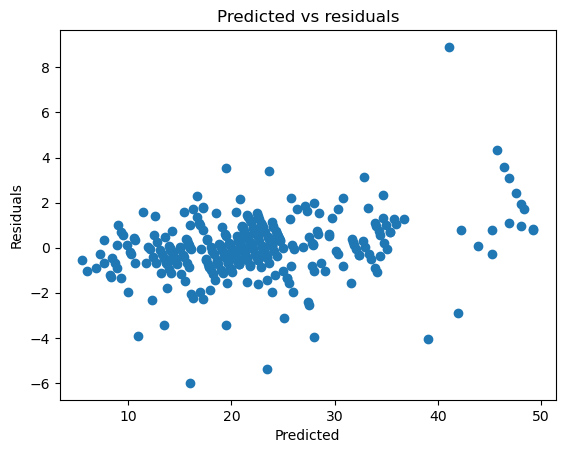

In [59]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

<Axes: xlabel='RAD', ylabel='count'>

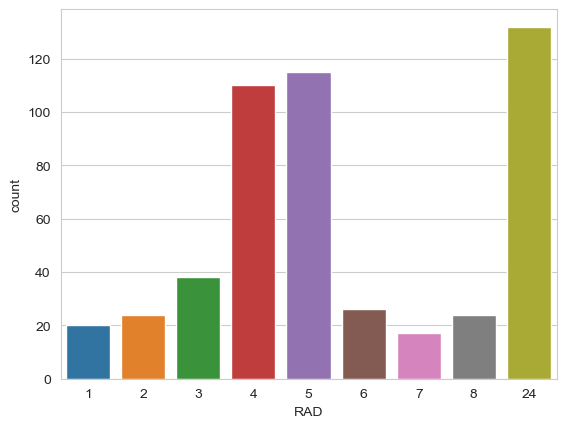

In [65]:
sns.set_style('whitegrid')
sns.countplot(x='RAD',data=df)

<Axes: xlabel='CHAS', ylabel='count'>

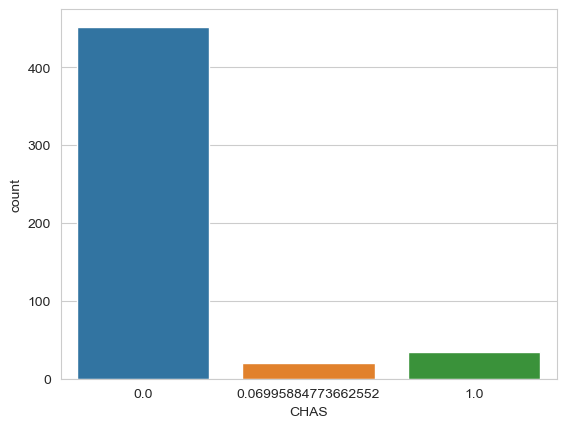

In [66]:
sns.set_style('whitegrid')
sns.countplot(x='CHAS',data=df)

<Axes: xlabel='CHAS', ylabel='count'>

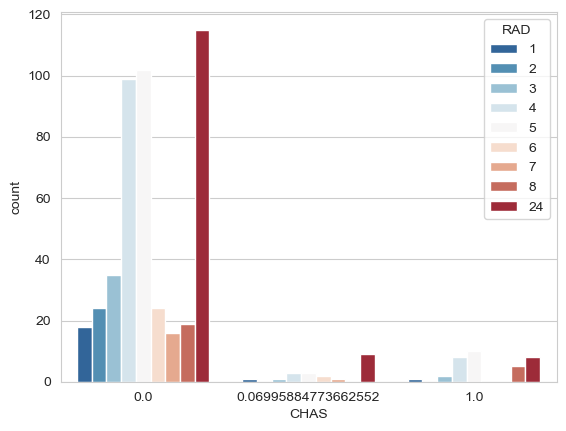

In [68]:
sns.set_style('whitegrid')
sns.countplot(x='CHAS',hue='RAD',data=df,palette='RdBu_r')